# **Дипломная работа**


# Тема:
"Анализ сотрудников компании и факторов увольнений (поиск инсайтов, составление рекомендаций стейкхолдерам, построение предиктивной модели увольнений)"


Студент: Степанов Сергей Васильевич

Профессия: "Аналитик данных"

Поток: DA-53






Москва 2023

# **Введение**

Целью данной работы является анализ сотрудников компании и факторов их увольнений.

Увольнение сотрудников — это один из главных вопросов современного мира. С одной стороны - это абсолютно естественное явление - кто-то выходит на пенсию, кто-то меняет профессию, а кто-то уходит за поиском более лучших условий. Что является проблемой - непосредственный уход сотрудника. Бизнес устроен таким образом, что того количества сотрудников, которое у него сейчас есть, всегда немного нехватает, иными словаби, бизнес всегда ищет себе сотрудников. И увольнение действующего сотрудника без подходящей замены для него - всегда является весмомой статьей расходов для компании.   

Этот анализ специально направлен на выявление причин добровольного ухода сотрудников и постараться найти ответ на то, можно ли предугадать увольнение сотрудника, а в идеале - предотвратить.

Источником данных является: [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Для обработки данных используется язык программирования Python. Для прогнозирования взята модель логистической регрессии и метрика accuracy.

# **Содержание:**
* Анализ данных
* Построение модели
* Выводы и рекомендации

# **Атрибуты датасета:**

**Age**: Числовые данные

**Attrition**: Текстовые данные

**BusinessTravel**: Текстовые данные

**DailyRate**: Числовые данные

**Department**: Текстовые данные

**DistanceFromHome**: Числовые данные

**Education**: Числовые категориальные данные
1. среднее
2. колледж
3. бакалавр
4. мастер
5. ученая степень

**EducationField**: Текстовые данные

**EmployeeCount**: Числовые категориальные данные

**EmployeeNumber**: Числовые категориальные данные

**EnvironmentSatisfaction**: Числовые категориальные данные
1. низкая
2. средняя
3. высокая
4. очень высокая

**Gender**: Текстовые данные

**HourlyRate**: Числовые данные

**JobInvolvement**: Числовые категориальные данные
1. низкая
2. средняя
3. высокая
4. очень высокая

**JobLevel**: Числовые категориальные данные

**JobRole**: Текстовые данные

**JobSatisfaction**: Числовые категориальные данные
1. низкая
2. средняя
3. высокая
4. очень высокая

**MaritalStatus**: Текстовые данные

**MonthlyIncome**: Числовые данные

**MonthlyRate**: Числовые данные

**NumCompaniesWorked**: Числовые данные

**Over18**: Текстовые данные

**OverTime**: Текстовые данные

**PercentSalaryHike**: Числовые данные

**PerformanceRating**: Числовые категориальные данные
1. низекий
2. хороший
3. превосходный
4. выдающийся

**RelationshipSatisfaction**: Числовые категориальные данные
1. низкая
2. средняя
3. высокая
4. очень высокая

**StandardHours**: Числовые данные

**StockOptionLevel**: Числовые категориальные данные

**TotalWorkingYears**:Числовые данные

**TrainingTimesLastYear**: Числовые данные

**WorkLifeBalance**: Числовые категориальные данные
1. плохой
2. нормальный
3. хороший
4. отличный

**YearsAtCompany**: Числовые данные

**YearsInCurrentRole**: Числовые данные

**YearsSinceLastPromotion**: Числовые данные

**YearsCurrManager**: Числовые данные

# **Анализ данных:**

In [ ]:
# Подключаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# загружаем данные из файла
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diploma/diploma_data.csv', delimiter=',')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Данные в столбце «Attrition» являются одними из самых важных в этом датафрейме, однако с ними довольно сложно работать в форме «да/нет». Давайте заменим их на 1 для «да» и 0 для «нет».

In [ ]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [ ]:
#проверим, что все получилось 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# узнаем чуть больше информации о базе данных и посмотрим на статистические данные:
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#получим больше информации:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Как видно из описания, данные содержат 35 столбцов, 27 из которых содержат данные типа int64, остальные 8 содержат данные типа object, пропущенных данных нет

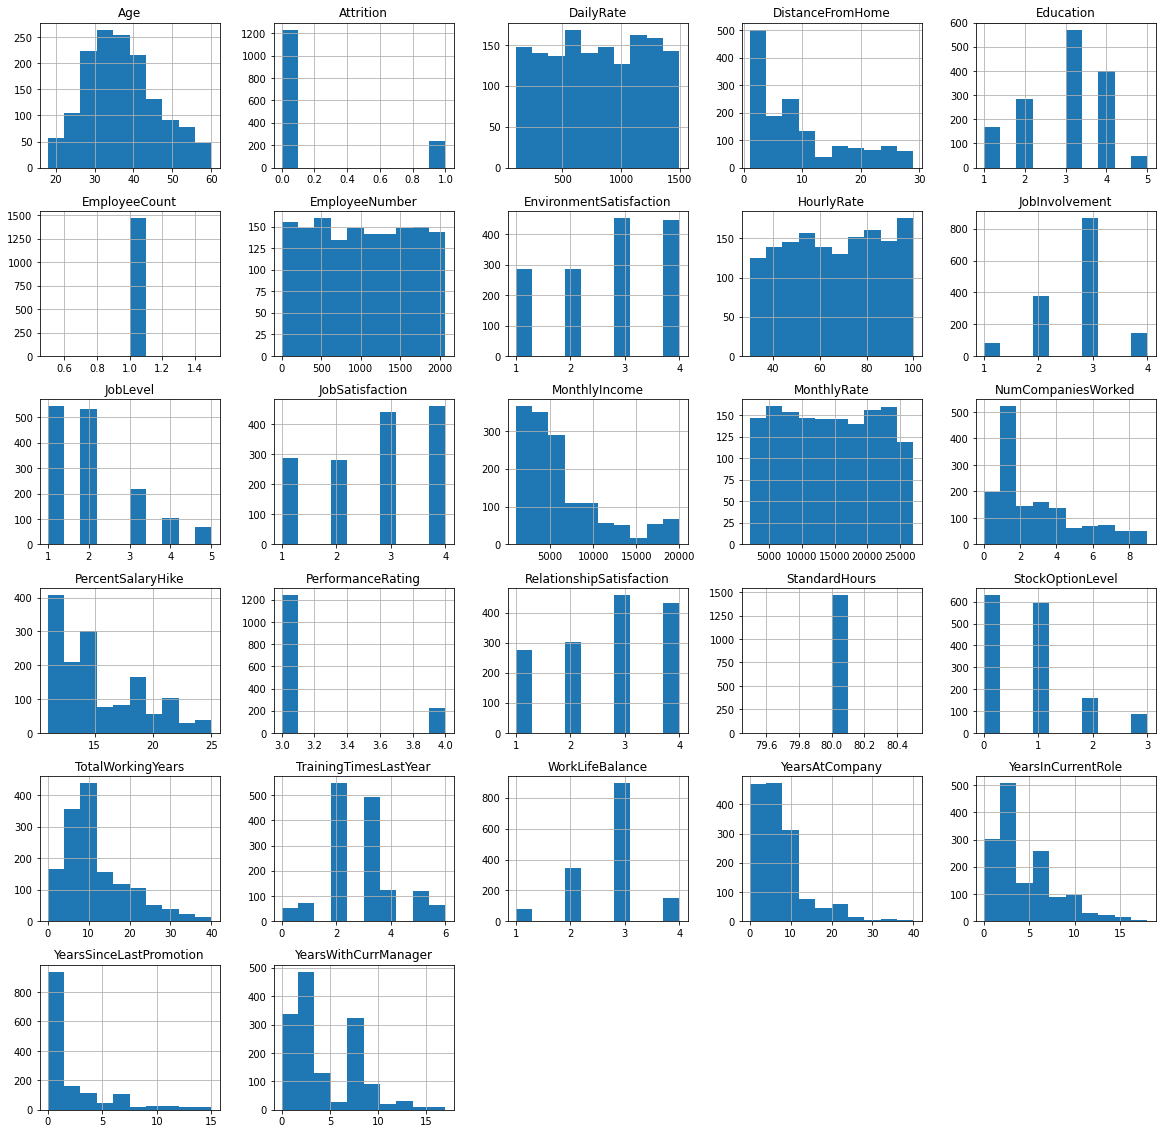

In [ ]:
#посмотрим на данные в графиках:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
#Посмотрим на зависимость данных от Attrition
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.077924
Attrition                   1.000000
EmployeeCount                    NaN
StandardHours                    NaN
N

Наиболее сильнаовыраженная зависимость уволившихся видна по столбцам: TotalWorkingYears, JobLevel, YearsInCurrentRole, MonthlyIncome, Age. Но исходя из данных нельзя выделить наиболее сильный фактор, влияющий на увольнение сотрудников

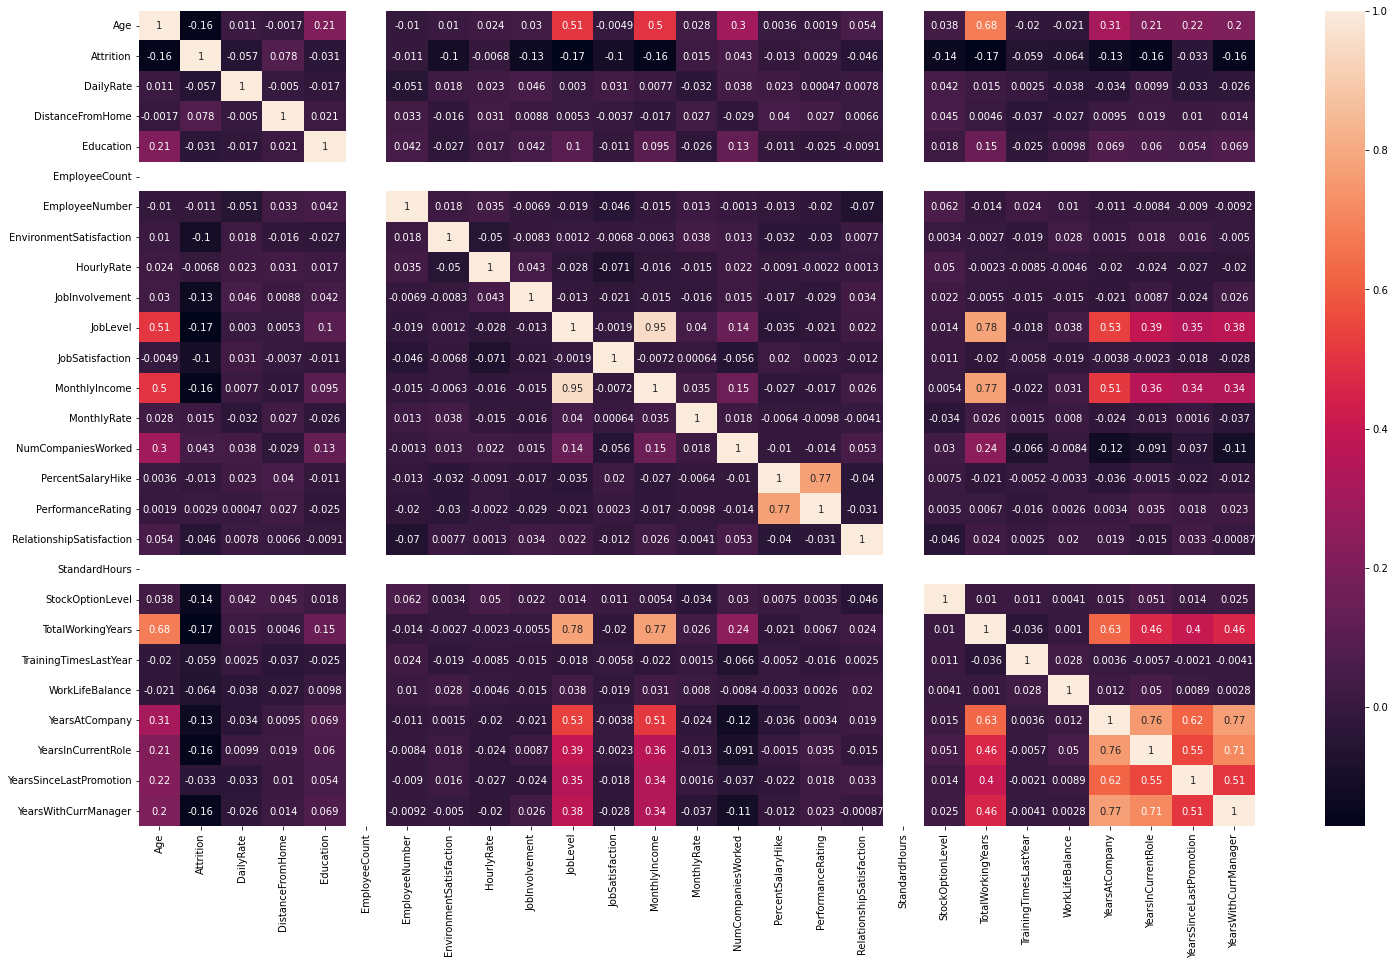

In [ ]:
# Визуализируем все зависимости в данных:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)

Наиболее сильные зависимости у JobLevel, Education, MontlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsCompany от Age

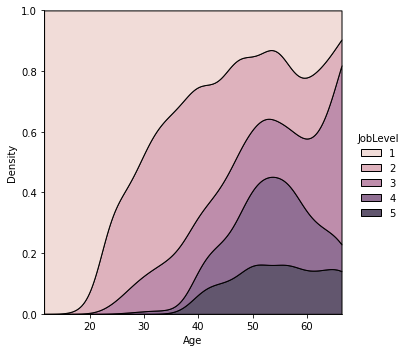

In [ ]:
sns.displot(df,x='Age',hue='JobLevel',kind='kde',multiple='fill')

На высоких должностях в основном работают люди старше 40

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


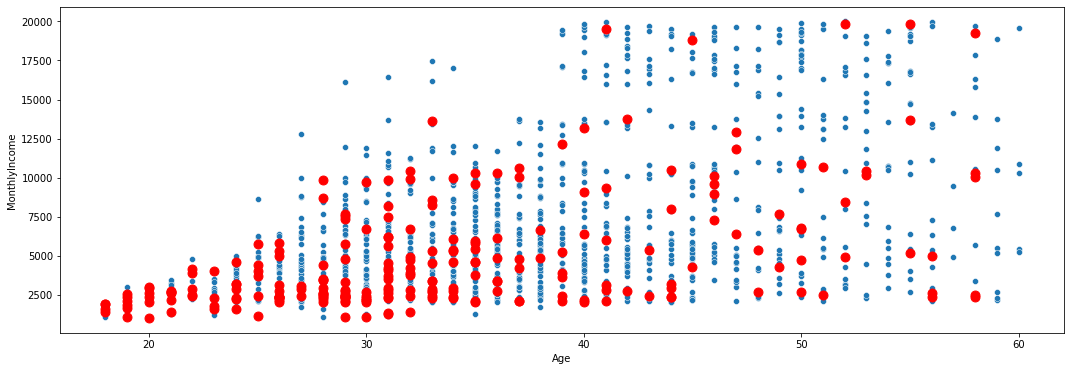

In [ ]:
plt.figure(figsize=(18,6))
sns.scatterplot(df[df.Attrition==0].Age,df[df.Attrition==0].MonthlyIncome)
plt.scatter(df[df.Attrition==1].Age,df[df.Attrition==1].MonthlyIncome,marker='o',c='r',s=80)

Большинство бывших сотрудников имели невысокий доход (ниже 7500) и в основном были моложе 40 лет. 

Нет конкретного большого влияния образования на Attrition

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


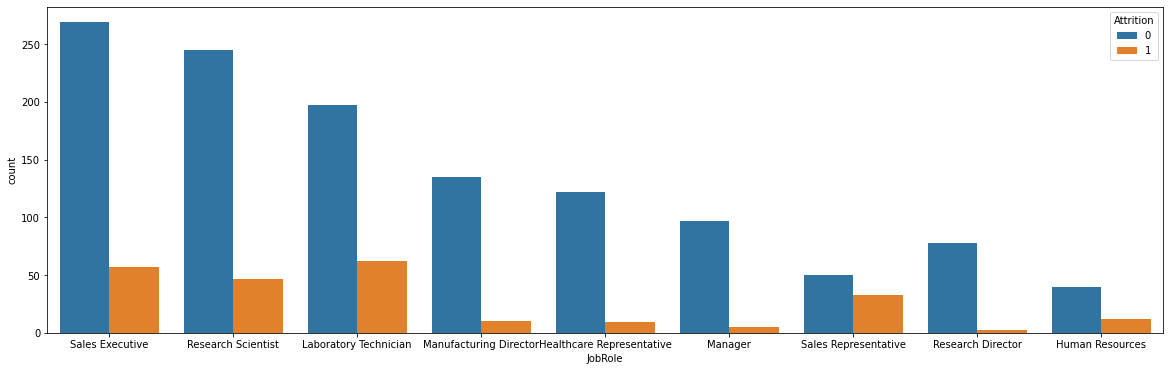

In [ ]:
fig=plt.figure(figsize=(20,6))
sns.countplot(df.JobRole,hue=df.Attrition)

Самая большая текучка кадров происходит в отделе "Sales Representative"

In [ ]:
#расчитаем долю уволившихся сотрудников по отделам
X=[]
for i in df.JobRole.unique():
    val=df[df.JobRole==i]['Attrition'].value_counts()[1] / (df[df.JobRole==i]['Attrition'].value_counts()[0]
                                                               +df[df.JobRole==i]['Attrition'].value_counts()[1])
    print(f"для сотрудников отдела {i} доля уволившихся составила {val}")
    X.append((val, i))

для сотрудников отдела Sales Executive доля уволившихся составила 0.17484662576687116
для сотрудников отдела Research Scientist доля уволившихся составила 0.16095890410958905
для сотрудников отдела Laboratory Technician доля уволившихся составила 0.23938223938223938
для сотрудников отдела Manufacturing Director доля уволившихся составила 0.06896551724137931
для сотрудников отдела Healthcare Representative доля уволившихся составила 0.06870229007633588
для сотрудников отдела Manager доля уволившихся составила 0.049019607843137254
для сотрудников отдела Sales Representative доля уволившихся составила 0.39759036144578314
для сотрудников отдела Research Director доля уволившихся составила 0.025
для сотрудников отдела Human Resources доля уволившихся составила 0.23076923076923078


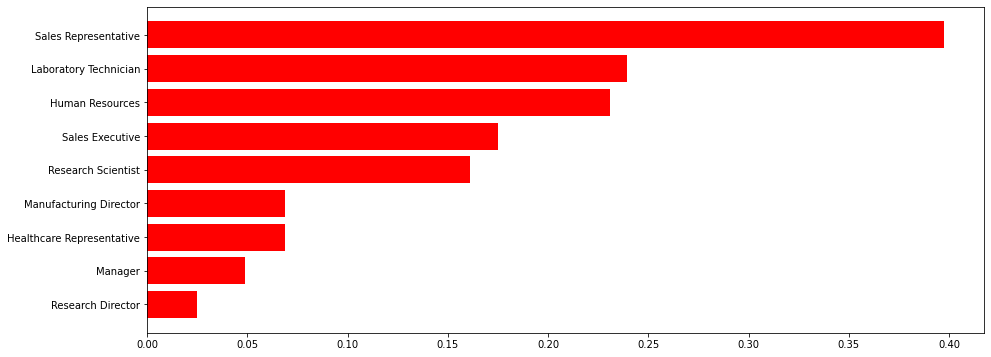

In [ ]:
#построим график уволившихся сотрудников по отделам
X_sorted = sorted(X)

depart_names = []
depart_score = []

for i in X_sorted: #разобъем наш список с данными по отделам и отделам на 2 списка и построим по ним график
    depart_names += [i[1]]
    depart_score += [i[0]]

fig=plt.figure(figsize=(15,6))

plt.barh(range(len(depart_score)), depart_score, color="r")
plt.yticks(range(len(depart_names)), depart_names);

От общего числа сотрудников максимальный процент сотрудников отдела "Sales Representative" покидает компанию

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


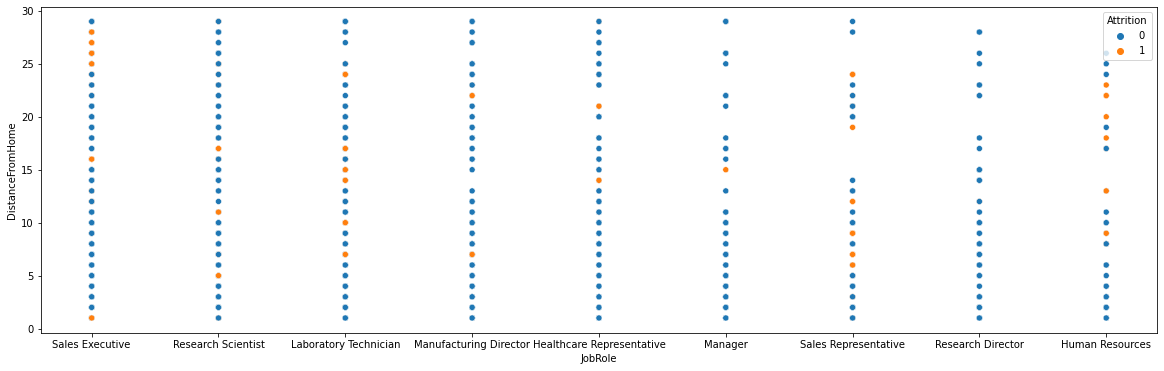

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(df.JobRole,df.DistanceFromHome,hue=df.Attrition)

Удаленность работы от дома не имеет сильного влияния на увольнение сотрудников компании

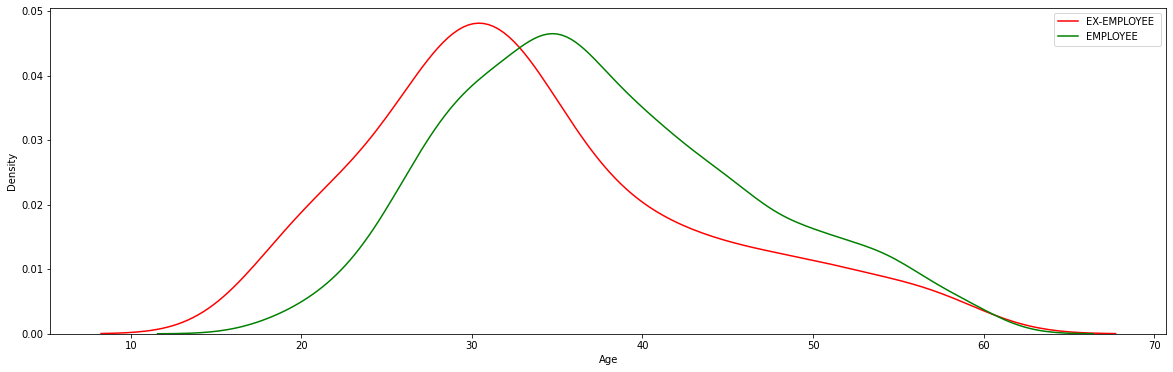

In [ ]:
plt.figure(figsize=(20,6))
sns.kdeplot(df[df.Attrition==1].Age,label='EX-EMPLOYEE ',color='r')
sns.kdeplot(df[df.Attrition==0].Age,label='EMPLOYEE',c='g')
plt.legend()

В основном молодые сотрудники покидают компанию

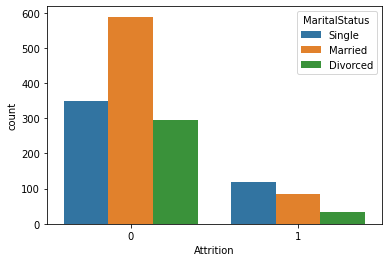

In [ ]:
sns.countplot(data=df,x='Attrition', hue= 'MaritalStatus')
plt.show()

Большинство женатых и разведенных сотрудников остаются в компании в отличие от одиноких

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f50bf44a580>],
      dtype=object)

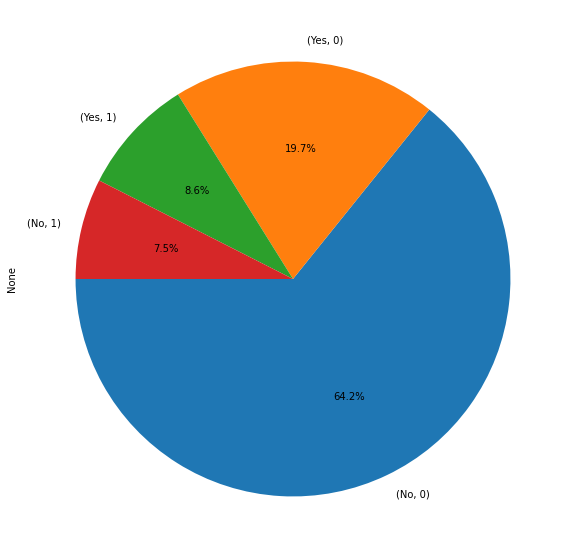

In [ ]:
plt.figure(figsize=(10,10))
df[["OverTime","Attrition"]].value_counts().plot(kind="pie",subplots=True,autopct='%1.1f%%', startangle=180)

Остались в компании =(19.7+64.2)=83.9%
Уволились = 100-"остались в компании"=16.1%
Из уволившихся 16,1% часть - 8,6% связаны со сверхурочной работой. Это означает, что (8,6/16,1) = 53,4% бывших сотрудников имели проблемы со сверхурочной работой. С другой стороны, 19,7% сотрудников также работают сверхурочно и не уволились. Таким образом говорить о том, что работа сверхурочно повлияла на принятие решения об увольнении нельзя, тк недостаточно для этого данных

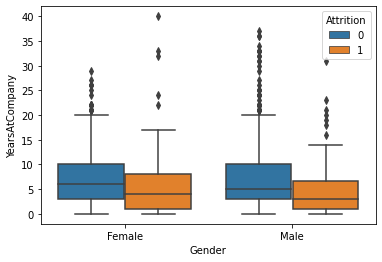

In [ ]:
sns.boxplot(data=df, x='Gender', y='YearsAtCompany',hue='Attrition')

Нет ярковыраженного гендерного признака, влияющего на увольнение сотрудников

# **Построение модели**

Проанализировав данные стало ясно, что их достаточно для формирования модели предсказания увольнения сотрудников.

Формируем признаки и целевую переменную:

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
X = df[['Age', 'DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
y = df[['Attrition']]

In [ ]:
#Разделяем данные на выборку для обучения/проверки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
#Создаем и обучаем модель Логистической регресии
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Получаем предсказание и оцениваем качество
y_pred = lr.predict(X_test)
print('Точность предсказания на тренировочных данных: {:.2f}'.format(lr.score(X_train, y_train)))
print('Точность предсказания на тестовых данных: {:.2f}'.format(lr.score(X_test, y_test)))

Точность предсказания на тренировочных данных: 0.85
Точность предсказания на тестовых данных: 0.82


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       241
           1       1.00      0.02      0.04        53

    accuracy                           0.82       294
   macro avg       0.91      0.51      0.47       294
weighted avg       0.85      0.82      0.75       294



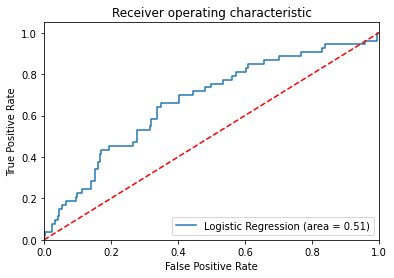

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Относительно модели можно сказать, что она обучилась и делает достаточно точные предсказания.

# **Выводы и рекомендации:**
В результате анализа данных мы можем сказать, что в основном компанию покидают молодые одинокие специалисты с невысоким уровнем дохода.
В качестве рекомендаций предлагается:
* Ввести нематериальное стимулирование сотрудников, помогающее им лучше узнать друг-друга и роль каждого в компании;
* Проводить постоянное анкетирование сотрудников, чтобы выявлять то, чего им не хватает для плодотворной и долгой работы в компании;
* Материальное стимулирование. Но тут нужно понимать, что материальное стимулирование не является ключом к удержанию сотрудника, это лишь временный инструмент, для того, чтобы найти ключ к интересам отдельно взятого работника.


